In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial import Polynomial

In [2]:
np.random.seed(12345)
x = np.random.normal(0,1,(200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0,1,(200))

**Question 6. a)**

Here n represents the size of the dataset which is 200 and p refers to the dimension of each data point which is 1.

The model equation is: $y = 2x + 2x^2 - 2x^3$
As we have set the random seed to (12345), we can assert that the value of np.random.normal() will be same throughout the cell hence x + np.random.normal(0, 1, (200)) = 2x

**Question 6.b)**

The scatterplot between x and y generates cubical graph. There is a cubical relation.

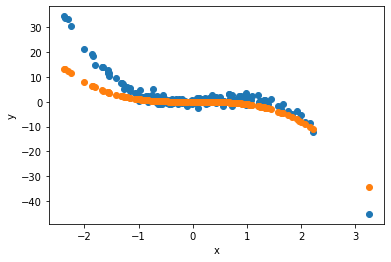

In [3]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,-x**3)

**The blue indicates the plot of the generated graph and the orange indicates the cubical graph. Which shows that the similarity between them.**

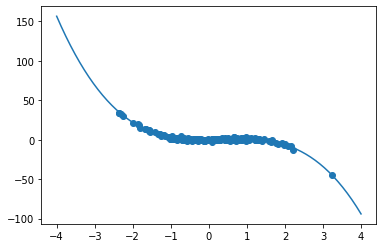

In [4]:
polyline = np.linspace(-4,4,200)
model = np.poly1d(np.polyfit(x,y,3))
plt.scatter(x,y)
plt.plot(polyline, model(polyline))
plt.show()

In [5]:
print(model)

        3         2
-2.021 x + 1.957 x + 1.003 x + 0.01806


**Question 6. c)**

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import random

In [7]:
random.seed(123)
c_v_d_123 = {}

for poly_val in range(1,6):
    poly_f = PolynomialFeatures(degree = poly_val, include_bias = True)
    x_poly = poly_f.fit_transform(x.reshape(-1,1))
    
    model = LinearRegression()
    
    cv = LeaveOneOut()
    
    c_v_d_123[poly_val] = cross_val_score(model, x_poly, y, scoring='neg_mean_squared_error', cv=cv).mean()

In [8]:
for i in range(1,6):
    print("Leave one out cross validation of degree " + str(i) + " is ",abs(c_v_d_123[i]))

Leave one out cross validation of degree 1 is  26.534996047663075
Leave one out cross validation of degree 2 is  32.53855587022528
Leave one out cross validation of degree 3 is  1.1079418003348256
Leave one out cross validation of degree 4 is  1.3234306760123546
Leave one out cross validation of degree 5 is  1.1099273761939197


In [9]:
x_poly

array([[ 1.00000000e+00, -2.04707659e-01,  4.19052259e-02,
        -8.57832070e-03,  1.75604795e-03, -3.59476467e-04],
       [ 1.00000000e+00,  4.78943338e-01,  2.29386721e-01,
         1.09863242e-01,  5.26182678e-02,  2.52011688e-02],
       [ 1.00000000e+00, -5.19438715e-01,  2.69816579e-01,
        -1.40153177e-01,  7.28009861e-02, -3.78156507e-02],
       ...,
       [ 1.00000000e+00, -1.41341604e+00,  1.99774490e+00,
        -2.82364468e+00,  3.99098468e+00, -5.64092176e+00],
       [ 1.00000000e+00,  1.29660784e+00,  1.68119190e+00,
         2.17984660e+00,  2.82640619e+00,  3.66474043e+00],
       [ 1.00000000e+00,  2.52275209e-01,  6.36427810e-02,
         1.60554959e-02,  4.05040358e-03,  1.02181641e-03]])

In [10]:
df = pd.DataFrame(x_poly) # add the columns as x,x^2,x^3
df.head()

,0,1,2,3,4,5
0,1.0,-0.204708,0.041905,-0.008578,0.001756,-0.000359
1,1.0,0.478943,0.229387,0.109863,0.052618,0.025201
2,1.0,-0.519439,0.269817,-0.140153,0.072801,-0.037816
3,1.0,-0.555730,0.308836,-0.171630,0.095380,-0.053005
4,1.0,1.965781,3.864293,7.596353,14.932762,29.354534


In [11]:
df.columns = ['β', 'x', 'x^2','x^3','x^4','x^5']

In [12]:
df.head()

,β,x,x^2,x^3,x^4,x^5
0,1.0,-0.204708,0.041905,-0.008578,0.001756,-0.000359
1,1.0,0.478943,0.229387,0.109863,0.052618,0.025201
2,1.0,-0.519439,0.269817,-0.140153,0.072801,-0.037816
3,1.0,-0.555730,0.308836,-0.171630,0.095380,-0.053005
4,1.0,1.965781,3.864293,7.596353,14.932762,29.354534


**Question 6. d)**

In [13]:
random.seed(12345)
c_v_d_12345 = {}

for poly_val in range(1,6):
    poly_f = PolynomialFeatures(degree = poly_val, include_bias = True)
    x_poly = poly_f.fit_transform(x.reshape(-1,1))
    
    model = LinearRegression().fit(x_poly, y)
    
    cv = LeaveOneOut()
    
    c_v_d_12345[poly_val] = cross_val_score(model, x_poly, y, scoring='neg_mean_squared_error', cv=cv).mean()

In [14]:
for i in range(1,6):
    print("Leave one out cross validation of degree " + str(i) + " is ",abs(c_v_d_12345[i]))

Leave one out cross validation of degree 1 is  26.534996047663075
Leave one out cross validation of degree 2 is  32.53855587022528
Leave one out cross validation of degree 3 is  1.1079418003348256
Leave one out cross validation of degree 4 is  1.3234306760123546
Leave one out cross validation of degree 5 is  1.1099273761939197


**Since we are splitting the dataset into n-1 (n is the total number of observations) segments for each step, the order in which the parts appear doesn't affect the outcome using seeds 123 and 12345. Because of this, the outcomes are unaffected by the seed.**

**Question 6. e)**

**The model with a 3rd degree polynomial produced the lowest cross validation error. Given that the relation between x and y is a the same 3rd degree polynomial, Yes, I anticipated that the model would provide the best score.**

$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3  + \varepsilon$ 

**Up to a certain point for a third degree polynomial, the bias and cross validation score reduces as the degree and complexity of the model increases. After this point, the model's complexity rises, which causes bias and cross validation to increase.**